# Polar Plot

In [2]:
""" Imports """
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO

In [18]:
""" User Inputs """
bact_genome_fna = '/Users/evelynfaust/Desktop/ORNL/CRISPRi_data_analysis/test_downstream_data/example_genome.fna'
log2_fc_csv = '/Users/evelynfaust/Desktop/ORNL/CRISPRi_data_analysis/test_downstream_data/Maggieexample_design_locus_log2FC.csv' # must have columns named 'locus', 'design', and 'Log2FC'
min_log2_fc = 1.5 # this is for display, both negative and positive are considered
max_log2_fc = 5 # this is for display, both negative and positive are considered
log2_fc_rings = (-2, 2, 4) # 'FC = {each of these numbers in provided tuple}' will be displayed next to rings in polar plot
offset = 0.02  # adjust the angle offset as needed to spread out the bars on the plot
bar_width_factor = 0.5 # adjust the width of the bars as needed
ring_label_position = 210 # optimal angle for ring labels
DPI = 300 # resolution of the output plot
plot_filename = '/Users/evelynfaust/Desktop/ORNL/Maggie_circularplot/FA20_design_locus_log2FC.png' # output plot filename



<div class="alert alert-block alert-warning">
<b>TODO:</b> 

- make colnames generalizable
- make code run even if there is not a range given in the locus column (i.e. 2 separate columns for start and end position)
- feature for adding gene names to plot!
- feature for adding legend to plot
- stylistic choices for plot
</div>

In [19]:
""" Data Read-in """
# Load the bacterial genome fna file
genome_record = SeqIO.read(bact_genome_fna, 'fasta')

# Load the log2 fold change data
df = pd.read_csv(log2_fc_csv)

# Ensure the 'locus', 'design', and 'Log2FC' columns exist in your DataFrame
if 'locus' not in df.columns or 'design' not in df.columns or 'Log2FC' not in df.columns:
    raise ValueError("The data file must contain 'locus', 'design', and 'Log2FC' columns.")

In [20]:
""" Manipulate Loci Info """
# Split 'locus' column into 'start' and 'end' positions
df[['start', 'end']] = df['locus'].str.split('-', expand=True)

# Convert 'start' and 'end' to numeric type
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate mean position
df['mean_position'] = (df['start'] + df['end']) / 2


In [21]:
""" Filtering """
# Filter data based on log2 fold change criteria
filtered_df = df[(df['Log2FC'] > min_log2_fc) | (df['Log2FC'] < -(min_log2_fc))].copy()

# Cap the log2 fold change values at a maximum value
filtered_df['Log2FC'] = filtered_df['Log2FC'].clip(-max_log2_fc, max_log2_fc)


In [23]:
""" Parameters for Plotting """
# Convert chromosome locations to angles
max_location = len(genome_record.seq)
filtered_df['angle'] = (filtered_df['mean_position'] / max_location) * 2 * np.pi

# Add an offset to the angles to spread the bars apart slightly
filtered_df['angle'] += np.linspace(-offset, offset, len(filtered_df))

# Calculate bar width based on angle spacing and number of bars
angle_diff = filtered_df['angle'].diff().fillna(0).min()  # Calculate minimum angle difference
bar_width = angle_diff * bar_width_factor

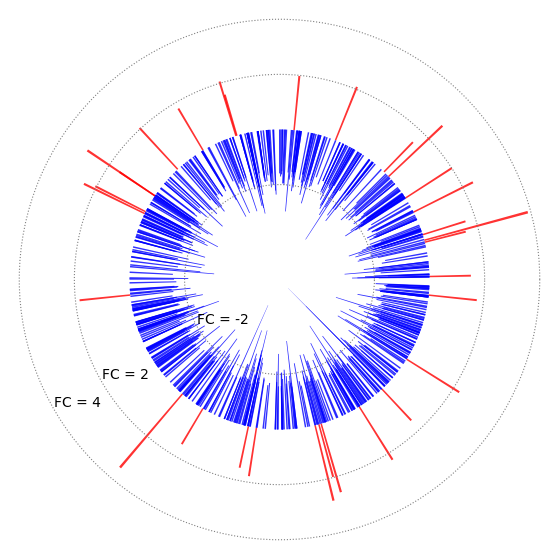

In [24]:
""" Plotting Polar Plot """
# Create a polar plot with bars
plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

# Add bar directionality
positive_bars = filtered_df['Log2FC'] > 0
negative_bars = filtered_df['Log2FC'] < 0
bar_start_bottom = 0
bars_positive = ax.bar(filtered_df['angle'][positive_bars], filtered_df['Log2FC'][positive_bars], width=0.01, align='center', bottom=bar_start_bottom, alpha=0.8, color='red')
bars_negative = ax.bar(filtered_df['angle'][negative_bars], filtered_df['Log2FC'][negative_bars], width=0.01, align='center', bottom=bar_start_bottom, alpha=0.8, color='blue')

# Add rings for log2 fold change values
ytick_list = [bar_start_bottom + ring for ring in log2_fc_rings]
yticklabels_list = [f'FC = {ring}' for ring in log2_fc_rings]
ax.set_yticks(ytick_list)
ax.set_yticklabels(yticklabels_list)
ax.yaxis.grid(True, linestyle=':', color='gray')
ax.set_rlabel_position(ring_label_position) # user input optimal angle for ring labels

# Set x axis (degrees around circle) and polar radial spines invisible
ax.xaxis.set_visible(False)
ax.spines['polar'].set_visible(False)

plt.show()

In [56]:
""" Save Plot """
plt.savefig(plot_filename, dpi=DPI)

<Figure size 640x480 with 0 Axes>

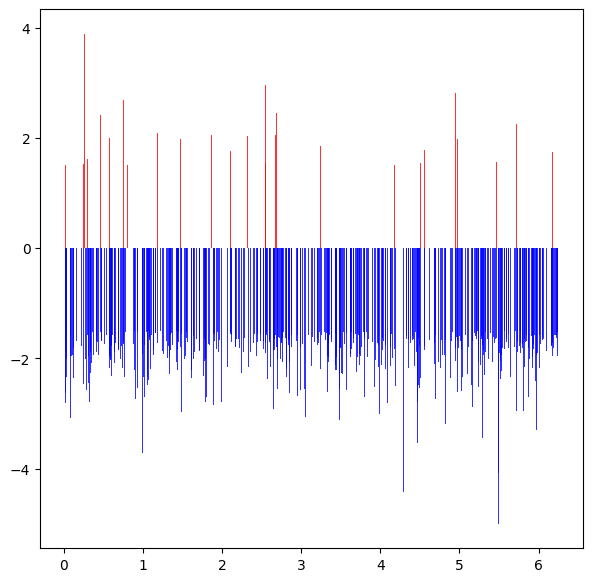

In [26]:
""" Linear version (Manhattan-like) Plot"""

plt.figure(figsize=(7,7))
ax = plt.subplot(111)

# Add bar directionality
positive_bars = filtered_df['Log2FC'] > 0
negative_bars = filtered_df['Log2FC'] < 0
bar_start_bottom = 0
bars_positive = ax.bar(filtered_df['angle'][positive_bars], filtered_df['Log2FC'][positive_bars], width=0.01, align='center', bottom=bar_start_bottom, alpha=0.8, color='red')
bars_negative = ax.bar(filtered_df['angle'][negative_bars], filtered_df['Log2FC'][negative_bars], width=0.01, align='center', bottom=bar_start_bottom, alpha=0.8, color='blue')

ytick_list = [bar_start_bottom + ring for ring in log2_fc_rings]
yticklabels_list = [f'FC = {ring}' for ring in log2_fc_rings]
ax.set_yticks(ytick_list)
ax.set_yticklabels(yticklabels_list)
